# Felipe veloso Desafio 15

# Desafío 1: Lectura de archivos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15,10)

import factor_analyzer as factor
import missingno as msng

ModuleNotFoundError: No module named 'factor_analyzer'

In [2]:
df = pd.read_csv('bfi.csv')

In [3]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


# Desafío 2: Preprocesamiento

In [4]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

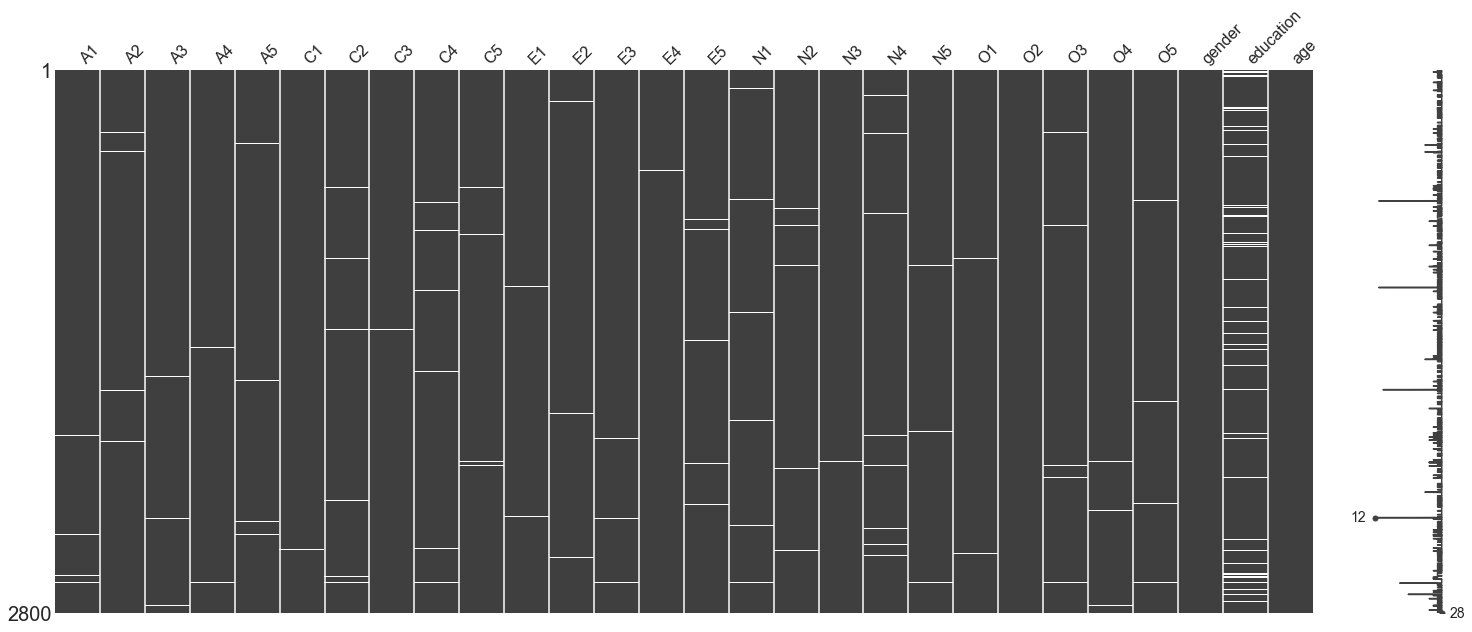

In [5]:
msng.matrix(df)

Se puede apreciar que la columna education posee la mayor cantidad de datos perdidos, el resto tiene una cantidad muy similar de data perdida

In [7]:
df_new = df.dropna()

# Desafío 3: Descripción

In [8]:
df_data = df_new.loc[:,'A1':'O5']
df_data.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


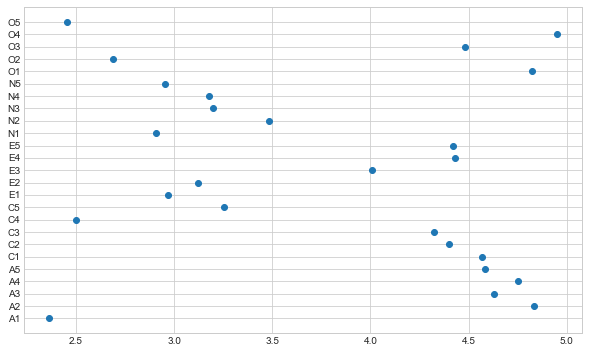

In [10]:
df_mean= df_data.mean()
plt.figure(figsize=(10,6))
plt.plot(df_mean.values, df_mean.index,'o')

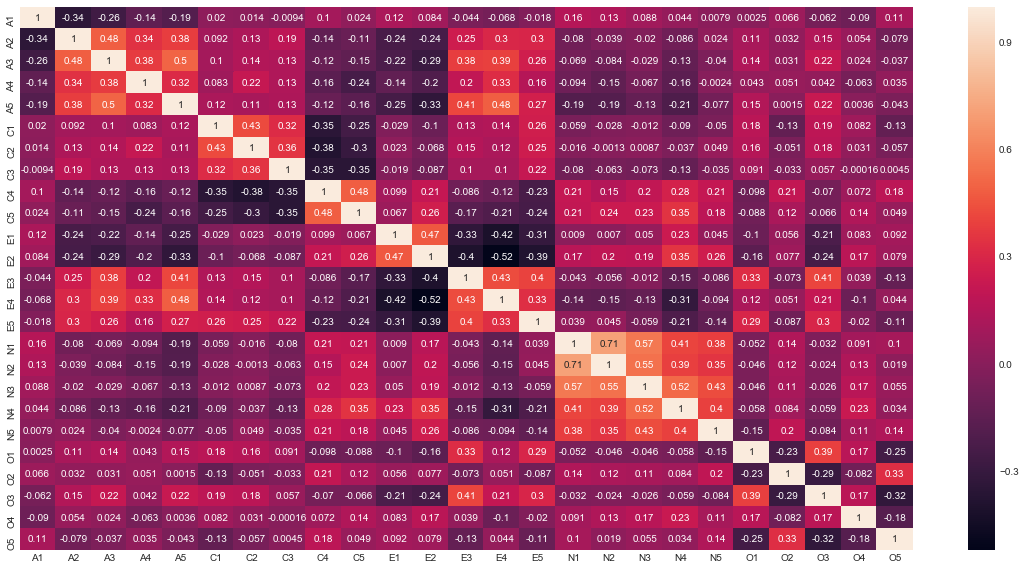

In [11]:
df_corr = df_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True)

se ven algunas correlaciones, nada realmente significativas, vemos que A2 A3 A4 y A5 tienen algun nivel de correlacion, lo mismo con N1 con N2 N3 N4 N5.

# Desafío 4: Extracción de factores

In [12]:
factor.calculate_bartlett_sphericity(df_data)
# Se verifica una data 0.0 lo cual indica que podrian haber factores

NameError: name 'factor' is not defined

In [11]:
factor.calculate_kmo(df_data)
# Al tener valores mayores a .7 se puede afirmar que xiste al menos un factor latente

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

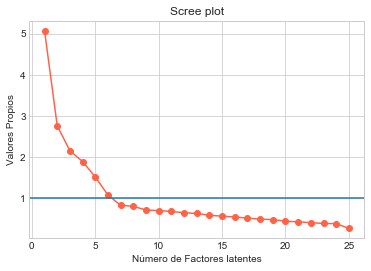

In [12]:
# Generamos una nueva instancia en el objeto factorize
factorize = factor.FactorAnalyzer(n_factors=10).fit(df_data)
# Implementamos el análisis
# factorize.analyze(data=trust_df, n_factors=2, method='varimax')
# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]
# # graficamos los eigenvalues contra la cantidad de dimensiones estimables
plt.plot(range(1,len(factor_screeplot)+1), factor_screeplot, 'o-', color='tomato')
plt.xlabel('Número de Factores latentes')
plt.ylabel('Valores Propios')
# # visualizamos el criterio de corte
plt.axhline(1)
plt.title("Scree plot");

# Desafío 5: Modelación de factores

In [13]:
factorize_6 = factor.FactorAnalyzer(n_factors=6).fit(df_data).transform(df_data)

In [14]:
factorize_6.shape

(2236, 6)

In [15]:
factor_scores= \
pd.DataFrame({
              'Factor1':factorize_6[:,0],
              'Factor2':factorize_6[:,1],
              'Factor3':factorize_6[:,2],
              'Factor4':factorize_6[:,3],
              'Factor5':factorize_6[:,4],
              'Factor6':factorize_6[:,5]
             })\

factor_scores.head()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
0,1.279171,0.000082,1.457212,-0.345160,-0.075729,0.197519
1,-1.773292,0.848142,-1.511693,0.260017,-1.934329,-1.440113
2,0.214909,-0.170640,-0.245855,0.368303,-0.216236,-0.152767
3,-0.074288,-0.324243,0.336190,0.179723,-1.579900,-0.938596
4,0.226286,-0.880137,-1.347977,-0.325867,0.717213,-0.142786


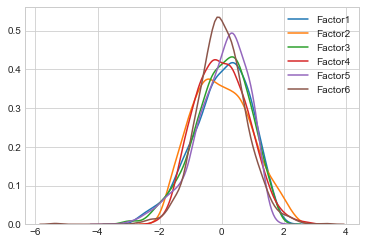

In [17]:
sns.kdeplot(factor_scores.Factor1.dropna())
sns.kdeplot(factor_scores.Factor2.dropna())
sns.kdeplot(factor_scores.Factor3.dropna())
sns.kdeplot(factor_scores.Factor4.dropna())
sns.kdeplot(factor_scores.Factor5.dropna())
sns.kdeplot(factor_scores.Factor6.dropna())

In [18]:
for col in factor_scores.columns:
    df[col] = factor_scores[col]

In [19]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O5,gender,education,age,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,1,NaN,16,1.279171,0.000082,1.457212,-0.345160,-0.075729,0.197519
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,2,NaN,18,-1.773292,0.848142,-1.511693,0.260017,-1.934329,-1.440113
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,2,NaN,17,0.214909,-0.170640,-0.245855,0.368303,-0.216236,-0.152767
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,5.0,2,NaN,17,-0.074288,-0.324243,0.336190,0.179723,-1.579900,-0.938596
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,3.0,1,NaN,17,0.226286,-0.880137,-1.347977,-0.325867,0.717213,-0.142786


In [20]:
df['gender'] = df['gender'].replace([1, 2], [1, 0])

In [21]:
for i in df.loc[:, 'Factor1':'Factor6']:
    print(i)
    print(smf.ols(i + "~ gender + education + age", df).fit().summary().tables[1])

Factor1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0495      0.077      0.643      0.520      -0.102       0.200
gender        -0.0217      0.044     -0.498      0.619      -0.107       0.064
education     -0.0034      0.019     -0.178      0.858      -0.040       0.034
age           -0.0008      0.002     -0.437      0.662      -0.005       0.003
Factor2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0106      0.078      0.136      0.892      -0.143       0.164
gender        -0.0357      0.044     -0.809      0.418      -0.122       0.051
education     -0.0115      0.019     -0.601      0.548      -0.049       0.026
age            0.0010      0.002      0.526      0.599      -0.003       0.005
Factor3
                 coef    std